In [4]:
import yt 
import yt_aspect

In [5]:
ds = yt.load("aspect/output_convection_box_3d/nproc_4/solution/solution-00003.pvtu")

yt : [INFO     ] 2023-08-25 16:19:28,118 Parameters: current_time              = 0.0
yt : [INFO     ] 2023-08-25 16:19:28,119 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2023-08-25 16:19:28,119 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-08-25 16:19:28,120 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2023-08-25 16:19:28,121 Parameters: cosmological_simulation   = 0


In [6]:
ds.field_list

[('all', 'T'),
 ('all', 'p'),
 ('all', 'velocity_x'),
 ('all', 'velocity_y'),
 ('all', 'velocity_z'),
 ('connect0', 'T'),
 ('connect0', 'p'),
 ('connect0', 'velocity_x'),
 ('connect0', 'velocity_y'),
 ('connect0', 'velocity_z')]

yt : [INFO     ] 2023-08-25 16:19:33,869 xlim = 0.000000 1.000000
yt : [INFO     ] 2023-08-25 16:19:33,869 ylim = 0.000000 1.000000
yt : [INFO     ] 2023-08-25 16:19:33,873 xlim = 0.000000 1.000000
yt : [INFO     ] 2023-08-25 16:19:33,873 ylim = 0.000000 1.000000
yt : [INFO     ] 2023-08-25 16:19:33,881 Making a fixed resolution buffer of (('all', 'T')) 800 by 800



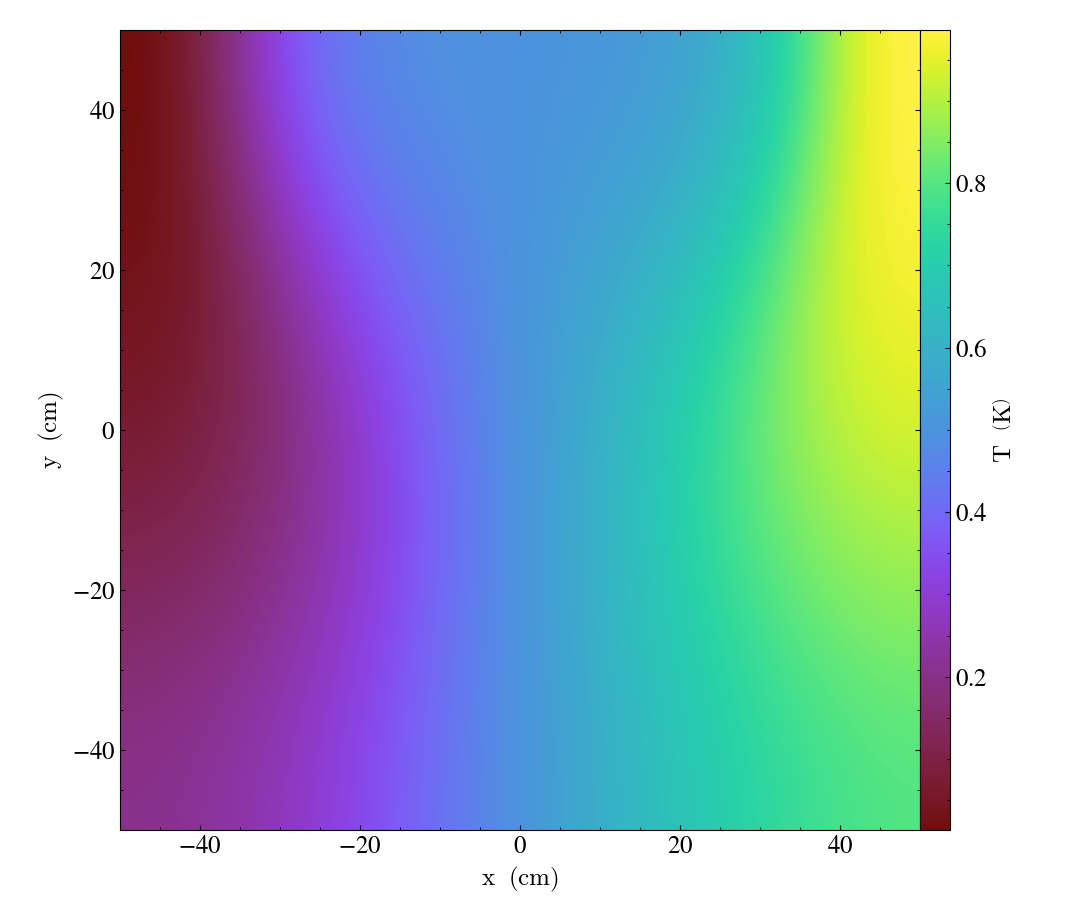

In [7]:
yt.SlicePlot(ds, "z", ("all", "T"))

In [14]:
#  3D, linear, hexahedral mesh elemen has 8 nodes 
import numpy as np
from yt.utilities.lib.element_mappings import Q1Sampler3D, Q1Sampler2D
import matplotlib.pyplot as plt 

hex_sampler = Q1Sampler3D() 

# check yt/utilities/mesh_types.yaml for node ordering
verts = [[0., 0., 0.], 
         [1., 0., 0.], 
         [1., 1., 0.], 
         [0., 1., 0.],
         [0., 0., 1.], 
         [1., 0., 1.], 
         [1., 1., 1.], 
         [0., 1., 1.]]
verts = np.array(verts)

field_vals = np.random.random((8,))

positions_to_sample = verts.copy() # should return exact

# def sample_at_real_points(self,
#                               np.float64_t[:,::1] vertices,
#                               np.float64_t[::1] field_values,
#                               np.float64_t[:,::1] positions):

sampled_values = hex_sampler.sample_at_real_points(verts, field_vals, positions_to_sample)
assert(np.allclose(sampled_values, field_vals))


# set field values to vary from one side to the other 
field_vals = np.full((8,), 5.) * (verts[:,2] == 1)

# sample along z, should vary linearly from 0 to 5.
nsamples = 100
y_samples = np.full((nsamples,), 0.5)
x_samples = np.full((nsamples,), 0.5)
z_samples = np.linspace(0,1,nsamples)

positions_to_sample = np.column_stack([x_samples, y_samples, z_samples])
positions_to_sample.shape
sampled_values = hex_sampler.sample_at_real_points(verts, field_vals, positions_to_sample)
assert(np.allclose(sampled_values, z_samples * 5.0))


(20, 75, 10)

In [21]:

x0 = np.linspace(0,1,20)
y0 = np.linspace(0,1,25)
z0 = np.full((10,),0.5)
xg, yg, zg = np.meshgrid(x0, y0, z0, indexing='ij')
positions_to_sample = np.column_stack([xg.ravel(), yg.ravel(), zg.ravel()])

field_vals = np.random.random((8,))
sampled_values = hex_sampler.sample_at_real_points(verts, field_vals, positions_to_sample)
sampled_values = sampled_values.reshape(xg.shape)

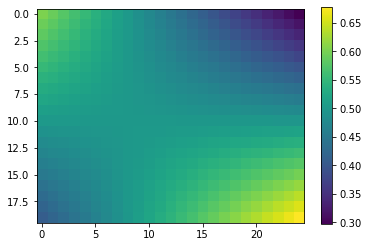

In [26]:
import matplotlib.pyplot as plt 

plt.imshow(sampled_values[:,:,0])
plt.colorbar()

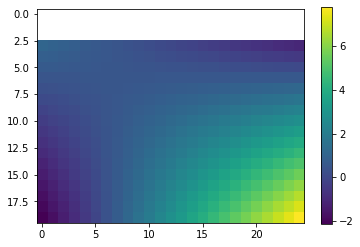

In [34]:

verts = [[0.2, 0.2, 0.], 
         [0.4, 0.2, 0.], 
         [0.4, 0.4, 0.], 
         [0.2, 0.4, 0.],
         [0.2, 0.2, 1.], 
         [0.4, 0.2, 1.], 
         [0.4, 0.4, 1.], 
         [0.2, 0.4, 1.]]
verts = np.array(verts)


sampled_values = hex_sampler.sample_at_real_points(verts, field_vals, positions_to_sample)
sampled_values = sampled_values.reshape(xg.shape)

unit_dists = hex_sampler.map_reals_to_unit(verts, positions_to_sample)
maskvals = np.sum(unit_dists < 0,axis=1) + np.sum(unit_dists>1, axis=1)
sampled_values[maskvals] = np.nan
import matplotlib.pyplot as plt 

plt.imshow(sampled_values[:,:,0])
plt.colorbar()

In [36]:
unit_dists>1

array([[False, False, False],
       [False, False, False],
       [False, False, False],
       ...,
       [ True,  True, False],
       [ True,  True, False],
       [ True,  True, False]])

In [7]:
import numpy as np
from yt.utilities.lib.element_mappings import Q1Sampler3D, Q1Sampler2D
quad_sampler = Q1Sampler2D()


# filling a non-uniform quad
verts = [[0., 0.,], 
         [1., 0.,], 
         [0., 1.,], 
         [1., 1.,]]
verts = np.array(verts)

field_vals = np.random.random((4,))


nsamples = 100
x_samples = np.full((nsamples,), 0.5)
y_samples = np.linspace(0,1,nsamples)
z_samples = np.zeros((nsamples,))
positions_to_sample = np.column_stack([x_samples, y_samples])
# x_test = np.linspace(0, 1, 10)
# y_test = np.linspace(0, 1, 4)
# xg, yg = np.meshgrid(x_test, y_test, indexing='ij')
# orig_shape = xg.shape
# xg = xg.ravel()
# yg = yg.ravel()
# zg = np.zeros(yg.shape)
# positions_to_sample = np.column_stack([xg, yg, zg])


sampled_vals = quad_sampler.sample_at_real_points(verts, field_vals, positions_to_sample)
sampled_vals

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [87]:
yg

array([0.        , 0.33333333, 0.66666667, 1.        , 0.        ,
       0.33333333, 0.66666667, 1.        , 0.        , 0.33333333,
       0.66666667, 1.        , 0.        , 0.33333333, 0.66666667,
       1.        , 0.        , 0.33333333, 0.66666667, 1.        ,
       0.        , 0.33333333, 0.66666667, 1.        , 0.        ,
       0.33333333, 0.66666667, 1.        , 0.        , 0.33333333,
       0.66666667, 1.        , 0.        , 0.33333333, 0.66666667,
       1.        , 0.        , 0.33333333, 0.66666667, 1.        ])

In [80]:
positions_to_sample.shape

(9000, 2)

In [81]:
verts.shape

(4, 2)

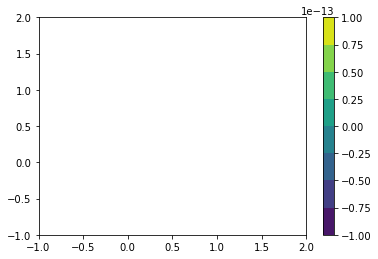

In [78]:

# not controlling for outside, that happens in pixelization, so do it here
# sampled_vals[sampled_vals<0] = np.nan

plt.contourf(y_test, x_test, sampled_vals)
plt.colorbar()

array([0.92585294, 0.10624669, 0.45829215, 0.6195386 , 0.97879821,
       0.41458781, 0.0157229 , 0.94737765])

In [25]:
field_vals

array([0.92585294, 0.10624669, 0.45829215, 0.6195386 , 0.97879821,
       0.41458781, 0.0157229 , 0.94737765])

True